## Домашнее задание №7

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split



data = pd.read_csv("Maternal_Health.csv")
print(data.shape)
data.head()

(1014, 7)


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


#### Обозначения:
1. Возраст: любой возраст в годах, когда женщина беременна.
2. Систолическое АД: Верхнее значение артериального давления в мм рт. ст., еще один важный атрибут во время беременности.
3. Диастолическое АД: более низкое значение артериального давления в мм рт. ст., еще один важный атрибут во время беременности.
4. BS: Уровень глюкозы в крови выражен в молярной концентрации, ммоль/л.
5. BodyTemp: Температура тела, градусов F.
6. HeartRate: нормальная частота сердечных сокращений в состоянии покоя в ударах в минуту.
7. Уровень риска: прогнозируемый уровень интенсивности риска во время беременности с учетом предыдущего атрибута

Разметим датасет (женщины с высоким риском - метка 1) - это класс 1.

Мы предполагаем, что люди со схожими на класс 1 признаками заболеваний, также могут быть в зоне риска.

In [4]:
data['y'] = data['RiskLevel'].apply(lambda x: 1 if x == 'high risk' else 0)

Удалим 6 столбец из датасета

In [6]:
data.drop(columns=['RiskLevel'], inplace=True)
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,y
0,25,130,80,15.0,98.0,86,1
1,35,140,90,13.0,98.0,70,1
2,29,90,70,8.0,100.0,80,1
3,30,140,85,7.0,98.0,70,1
4,35,120,60,6.1,98.0,76,0


Посмотрим типы данных в датасете

In [8]:
data.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
y                int64
dtype: object

In [9]:
data['SystolicBP'].value_counts()

120    449
90     154
140    120
100     92
130     60
85      43
110     19
76      16
95      12
160     10
75       8
115      8
70       7
80       5
135      3
78       3
83       2
99       2
129      1
Name: SystolicBP, dtype: int64

In [10]:
data['DiastolicBP'].value_counts()	

80     226
60     174
90     153
70     100
100     87
65      87
85      49
75      38
95      36
49      25
50      24
63       8
76       3
68       2
89       1
69       1
Name: DiastolicBP, dtype: int64

In [11]:
data['y'].value_counts()

0    742
1    272
Name: y, dtype: int64

In [12]:
data['Age'].unique()

array([25, 35, 29, 30, 23, 32, 42, 19, 20, 48, 15, 50, 10, 40, 21, 18, 16,
       22, 49, 28, 12, 60, 55, 45, 31, 17, 26, 54, 44, 33, 13, 34, 38, 39,
       63, 14, 37, 51, 62, 43, 65, 66, 56, 70, 27, 36, 59, 24, 41, 46])

Возраст старше 50 лет можно не брать в выборку, так как женщина старшего возраста вряд ли будет беременной

In [13]:
data['BS'].unique()

array([15.  , 13.  ,  8.  ,  7.  ,  6.1 ,  7.01, 11.  ,  6.9 , 18.  ,
        6.7 ,  7.5 ,  7.2 ,  7.1 ,  6.4 ,  9.  ,  6.  ,  7.7 , 12.  ,
       16.  ,  7.8 ,  6.8 ,  7.9 , 17.  , 19.  , 10.  ,  6.3 ,  6.6 ,
        6.5 ,  7.6 ])

Разбиваем выборку на тренировочную и тестовую части и обучаем модель

In [14]:
x_data = data.iloc[:,:-1]
y_data = data.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=7)

In [15]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import xgboost as xgb

model = xgb.XGBClassifier()

model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [17]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score

def evaluate_results(y_test, y_predict):
    print('Classification results:')
    f1 = f1_score(y_test, y_predict)
    print(f"f1: {f1 * 100.0:.2f}%") 
    rec = recall_score(y_test, y_predict, average='binary')
    print(f"recall: {rec * 100.0:.2f}%") 
    prc = precision_score(y_test, y_predict, average='binary')
    print(f"precision: {prc * 100.0:.2f}%" ) 

    
evaluate_results(y_test, y_predict)

Classification results:
f1: 90.74%
recall: 85.96%
precision: 96.08%


## SHAP

In [18]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 26.5 MB/s 


In [19]:
import shap

# load JS visualization code to notebook
shap.initjs()

#from sklearn.feature_extraction.text import TfidfVectorizer
import itertools

import matplotlib.pyplot as plt
%matplotlib inline

LGBM

Отрисовка идет по двум классам

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


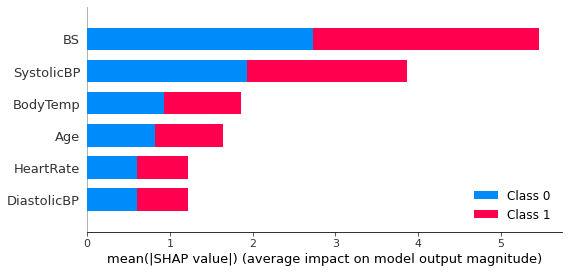

In [21]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier(random_state=1)
lgb_model.fit(x_train, y_train)

y_preds = lgb_model.predict(x_test)

# строим модель объяснения в SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(x_test)

# покажем объяснение
shap.initjs() # для работы в колабе
shap.summary_plot(shap_values, x_test)

Поэтому будем анализировать только первый класс - целевой.

Explained expected value: [[ 0.72913021  6.48551504  0.78568849  4.49322357 -0.19922289 -0.81261445]
 [ 0.0554708  -0.31994379 -0.03034419 -2.56403072 -0.49939189 -0.24871304]
 [-0.91363007 -1.20411014 -0.04972262 -1.98924157  2.99543777 -0.08774246]
 ...
 [ 0.15297945 -1.26064735 -1.16963335 -3.85469045 -0.61667866 -0.42937079]
 [ 0.79885451  6.32079938  0.82279724  4.71763728 -0.18786725 -0.77086776]
 [-0.45677279 -1.50008892 -0.70238349 -2.68482863 -0.59624321  0.54450849]]


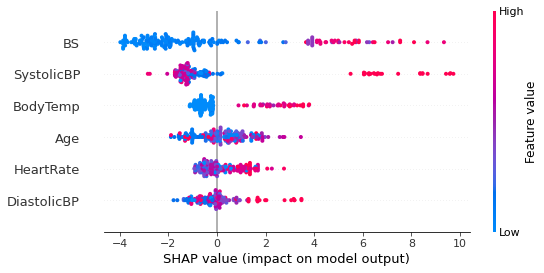

In [22]:
if isinstance(shap_values, list):
    shap_values = shap_values[1]

print(f'Explained expected value: {shap_values}')

shap.summary_plot(shap_values, x_test)

**Интерпретации:**
1. Уровень глюкозы в крови у женщин - является самым значимым показателем в модели, в нем отчетливо видно, как женщины с высокими значениями BS имеют высокий риск заболевания.
2. Женщины с высокими показателями систолического давления (SistolicBP), возраста (Age), чсс (HeartRate), диастолического давления (DiastolicBP) могут иметь как высокий риск заболевания, так и низкий.
3. Женщины с высокой температурой тела (BodyTemp) имеют высокий риск заболевания.


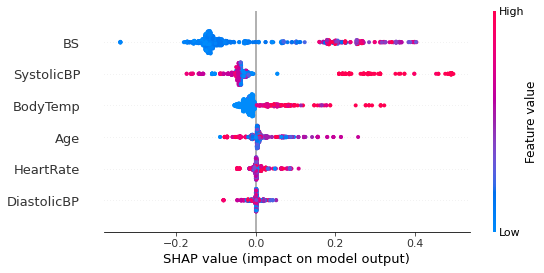

In [23]:
model = xgboost.train({"learning_rate": 0.01, 'random_state': 1}, 
                      xgboost.DMatrix(x_train, label=y_train), 100)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values_all = explainer.shap_values(x_train)

shap.summary_plot(shap_values_all, x_train)

Эта модель показывает примерно такую же картину, как и LGBM.


In [24]:
# visualize the first prediction's explanation
shap.initjs()
idx = 10
shap.force_plot(explainer.expected_value, shap_values_all[idx,:], x_train.iloc[idx,:])

Выше видим, что у женщины высокий риск заболевания (0.81) и видим вклад признаков, в этот результат: 
- Низкий показатель уровня глюкозы делает риск ниже
- Высокие показатели температуры тела и систолического давления, задают высокий риск для заболевания

In [25]:
shap.initjs()
idx = 35
shap.force_plot(explainer.expected_value, shap_values_all[idx,:], x_train.iloc[idx,:])

Выше видим, что у женщины низкий риск заболевания (0.18):
- Наибольший вклад в низкий риск заболеть вносит низкий уровень глюкозы, далее по величине вклада следует низкий уровень систолического давления, низкая темпертура тела и молодой возраст

In [26]:
shap.initjs()
idx = 99
shap.force_plot(explainer.expected_value, shap_values_all[idx,:], x_train.iloc[idx,:])

Выше видим, что у женщины высокий риск заболевания (0.54) и видим вклад признаков, в этот результат: 
- Низкие показатели систолического давления и возраста делают риск ниже
- Высокие показатели диастолического давления, чсс и уровня глюкозы задают высокий риск для заболевания

In [27]:
shap.initjs()
idx = 101
shap.force_plot(explainer.expected_value, shap_values_all[idx,:], x_train.iloc[idx,:])

Выше видим, что у женщины низкий риск заболевания (0.18):
- Наибольший вклад в низкий риск заболеть вносит низкий уровень глюкозы, далее по величине вклада следует низкий уровень систолического давления, низкая температура тела

In [29]:
shap.initjs()
idx = 134
shap.force_plot(explainer.expected_value, shap_values_all[idx,:], x_train.iloc[idx,:])

Выше видим, что у женщины низкий риск заболевания (0.22):
- Наибольший вклад в низкий риск заболеть вносит низкий уровень глюкозы, ему в противовес идет высокий уровень систолического давления

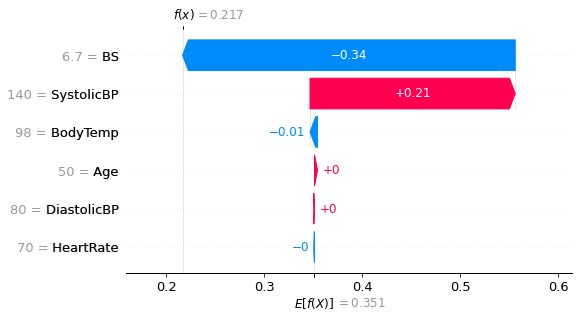

In [30]:
shap_values_one = explainer(x_train.iloc[idx:idx+1])
shap.plots.waterfall(shap_values_one[0])

Можно даже просто взять средние значения SHAP для каждого признака

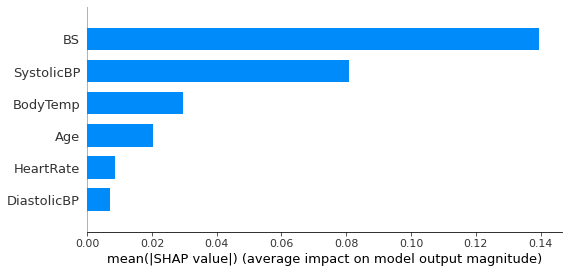

In [31]:
shap.summary_plot(shap_values_all, x_train, plot_type="bar")

По данной диаграмме мы видим, что:
1. По факту основные три признака описывают нашу задачу
2. Большое значение нашего таргета описываются уровнем глюкозы (BS) с большим shap значением